<a href="https://colab.research.google.com/github/harsh-jaiswal13/MACHINE_Learning/blob/main/fashion_mnsit_classification_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d zalando-research/fashionmnist

 97% 67.0M/68.8M [00:03<00:00, 30.8MB/s]
100% 68.8M/68.8M [00:03<00:00, 22.6MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/fashionmnist.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [7]:
df=pd.read_csv('/content/fashion-mnist_train.csv')
df_test=pd.read_csv('/content/fashion-mnist_test.csv')

In [8]:
df.shape
ndf=df.drop(['label'],axis=1).to_numpy()

In [9]:
ndf.shape
ndf=ndf.reshape(60000,28,28,1)

In [ ]:
df.head()

In [ ]:
a=[[1, 2, 3,4]
  ,[1 ,2 ,3,4]
  ,[1 ,2, 3,4]]
a=np.array(a)
a=a.reshape(3,2,2)
a

In [11]:
# a.shape
num_classes=10
y_train = keras.utils.to_categorical(np.array(df['label']), num_classes)

In [ ]:
y_train[0]

In [16]:
df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

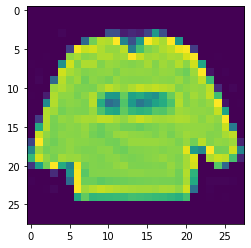

In [83]:
plt.imshow(np.array(df.drop(['label'],axis=1)[:1]).reshape(28,28))
plt.show()


In [23]:
num_classes =10
input_shape=(28,28,1)

# (x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train=df.drop(['label'],axis=1)
x_test=df_test.drop(['label'],axis=1)
y_train=df['label']

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
y_test=df_test['label']

# print(x_train.shape)
# x_train=x_train.reshape(28,28)
x_test=np.expand_dims(x_test,-1)
x_train=np.expand_dims(x_train,-1)


print("x_train shape: ",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")
print("y_train[0]:" ,y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train[0]:" ,y_train[0])

x_train shape:  (60000, 784, 1)
60000 train samples
10000 test samples
y_train[0]: 2
y_train[0]: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [78]:
y_train.shape

(60000, 10)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train.head(1)

In [24]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
batch_size = 150
epochs = 120
callback = EarlyStopping(monitor="val_loss",min_delta=0.00001,patience=20,verbose=1,mode="auto",baseline=None,restore_best_weights=False)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.history=model.fit(ndf, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.1,callbacks=callback)

Epoch 1/120
360/360 [==============================] - 4s 9ms/step - loss: 0.4233 - accuracy: 0.8649 - val_loss: 0.3961 - val_accuracy: 0.8652
Epoch 2/120
360/360 [==============================] - 3s 8ms/step - loss: 0.3503 - accuracy: 0.8753 - val_loss: 0.3704 - val_accuracy: 0.8702
Epoch 3/120
360/360 [==============================] - 4s 10ms/step - loss: 0.3328 - accuracy: 0.8795 - val_loss: 0.3873 - val_accuracy: 0.8657
Epoch 4/120
360/360 [==============================] - 4s 11ms/step - loss: 0.3286 - accuracy: 0.8808 - val_loss: 0.3549 - val_accuracy: 0.8768
Epoch 5/120
360/360 [==============================] - 3s 8ms/step - loss: 0.2971 - accuracy: 0.8914 - val_loss: 0.3287 - val_accuracy: 0.8853
Epoch 6/120
360/360 [==============================] - 3s 8ms/step - loss: 0.2866 - accuracy: 0.8946 - val_loss: 0.3610 - val_accuracy: 0.8712
Epoch 7/120
360/360 [==============================] - 3s 8ms/step - loss: 0.2791 - accuracy: 0.8958 - val_loss: 0.3440 - val_accuracy: 0.88